Trabajo Practico Final - Arquipa, Juan Agustín 43.949.474
                        - Romero, Nahuel 42.706.292
-> Desarrollo del TP Final

## MODELO NUMERO 1
-> Regresion LIneal aplicada etimologicamente en diversos parametros intercaldos.

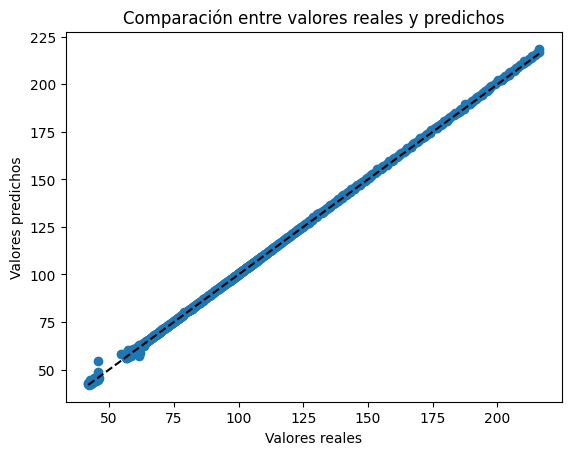

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
#from sklearn.metrics import mean_squared_error, r2_score

url = 'datos_trabajo_final_2.csv'
datos_dolar = pd.read_csv(url, index_col=0)

datos_dolar.head()

url_y_test = 'y_test.csv'
first_test = int(len(datos_dolar) * 0.9)
testeo_def = datos_dolar.iloc[first_test:]
X = datos_dolar.iloc[:first_test]
X = datos_dolar.drop(columns=['y'])

y = datos_dolar[['y']]

first_val = int(len(X) * 0.8)
X_train = X.iloc[:first_val]
y_train = y.iloc[:first_val]

#Solo puedo tocar estos datos una vez...
X_test = X.iloc[first_val:]
y_test = pd.read_csv(url_y_test, index_col=0)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Función para evaluar un modelo y obtener las métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(model_lr, X_test, y_test)

y_pred = model_lr.predict(X_test)

# Crear un gráfico de puntos (scatter plot)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')

# Trazar una línea diagonal que representa una relación perfecta entre los valores reales y los valores predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Mostrar el gráfico
plt.show()


Elegimos en conjunto estas métricas porque son ampliamente utilizadas y proporcionan información útil sobre el rendimiento de un modelo de regresión. El MSE permite evaluar la precisión numérica del modelo y el R^2 proporciona una medida de la bondad del ajuste global. Combinando ambas métricas, se obtiene una visión más completa del rendimiento del modelo

# Modelo 2, implementando SGDRegresor y metrica mean_absoulte_error

Importamos el las metricas y el modelo, tambien el scaler y el model_selection que nos servira para 
entrenar el modelo

In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

Entrenamos el modelo con SGDRegressor usando parametros default.
Instanciamos el modelo con con un random state

In [4]:
#Instanciamos el modelo con random state
rng = np.random.RandomState(0)
sgdmodel = SGDRegressor(random_state=rng)

#Entrenamos el modelo con los datos
sgdmodel.fit(X_train, y_train)

#Obtenemos la prediccion
ypredic = sgdmodel.predict(X_test)
#Obtenemos el error absoluto medio
mae_y = mean_absolute_error(y_test, ypredic)


/home/agustin/Documentos/Visual Code/MachineLearning/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mostramos el error absoluto medio obtenido

In [5]:
print(f"Error Absolute Mean: {mae_y}")

Error Absolute Mean: 42414383092.12688


Seteamos los valores que queremos mostrar con el matplobit, y realizamos una comparacion de los valores reales y predichos

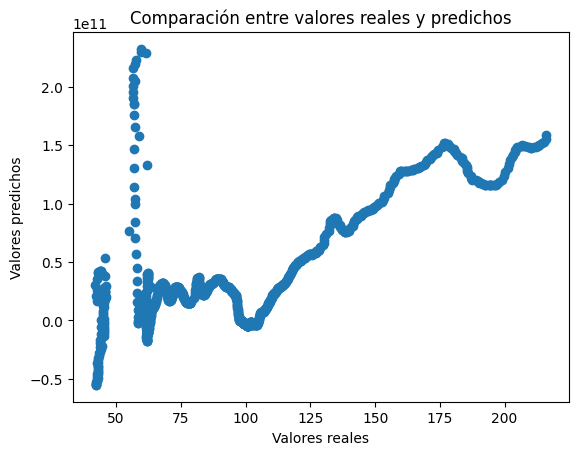

In [6]:
plt.scatter(y_test, ypredic)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')

plt.show()

-> Una vez Obtenidos los datos.

Podemos cambiar los HIPERMARAMETROS del modelo SGDRegressor


In [11]:
#Instanciamos el modelo con los hiperparametros ajustados
sgdmodel = SGDRegressor(alpha=0.1, learning_rate='optimal', max_iter=10, epsilon=0.1, penalty='l2')
'''
Usamos una iteraccion de 10
'''

#Entrenamos el modelo con los datos
sgdmodel.fit(X_train, y_train)

#Obtenemos la prediccion
ypredic = sgdmodel.predict(X_test)

mae_y = mean_absolute_error(y_test, ypredic)

/home/agustin/Documentos/Visual Code/MachineLearning/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/agustin/Documentos/Visual Code/MachineLearning/my_env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Se ha cambiado el valor de alpha a 0.01, se ha utilizado learning_rate='optimal', se ha aumentado el número máximo de iteraciones a 1000, se ha establecido epsilon en 0.1 y se ha utilizado la regularización 'l2'. Se puede experimentar con diferentes valores de hiperparámetros y observar cómo afectan el rendimiento del modelo. Recordamos que el ajuste de hiperparámetros es un proceso iterativo y puede requerir prueba y error para encontrar la combinación óptima para tu conjunto de datos y problema específico.

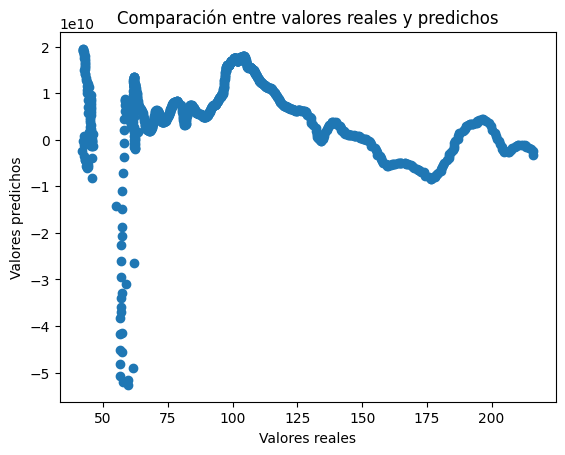

In [12]:
#Mostramos los datos
plt.scatter(y_test, ypredic)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')

plt.show()

Ahora bien, queremos mostrar en el grafico el error medio absoluto y la prediccion obtenida (ypredic), para eso
con matplobit trazamos los valores predichos con plot(), y con bar() mostramos el error medio absoluto obtenido.

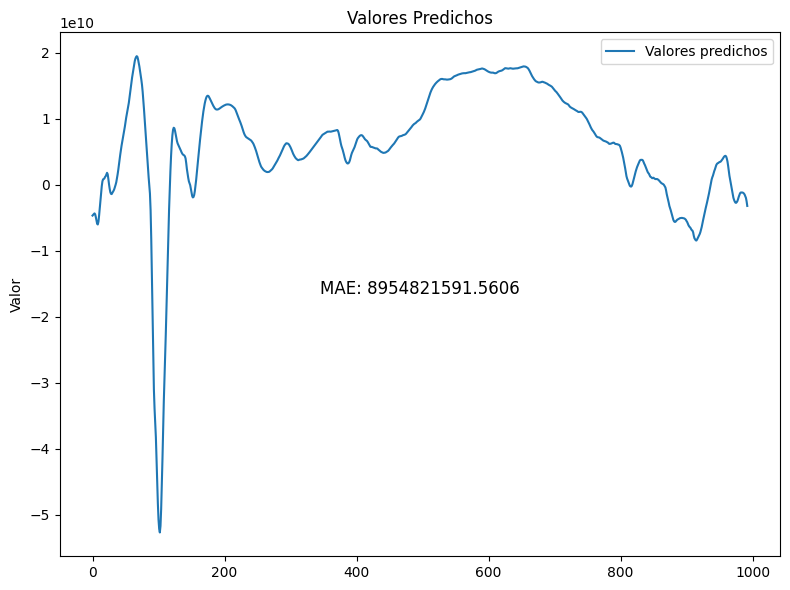

In [17]:
#Creamos una figura con dos subplots
fig, (ax) = plt.subplots(figsize=(8, 6))

#Subplot 1: Valores predichos
ax.plot(y_test.index, ypredic, label='Valores predichos')
ax.set_ylabel('Valor')
ax.set_title('Valores Predichos')
ax.legend()

#Subplot 2: Error medio absoluto
ax.text(0.5, 0.5, f"MAE: {mae_y:.4f}", transform=ax.transAxes, ha='center', fontsize=12)

#Ajustamos el espacio entre subplots
plt.tight_layout()

plt.show()

## Modelo 3


-> Usando Regresion Lineal


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Cargar los datos

In [2]:
url = 'datos_trabajo_final_2.csv'
data = pd.read_csv(url)


Dividir los datos en características (X) y etiquetas (y)

In [3]:
X = data.drop(columns=['y'])
y = data['y']


Dividir los datos en conjuntos de entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Crear y entrenar el modelo de regresión lineal

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Realizar predicciones en el conjunto de prueba

In [7]:
y_pred = model.predict(X_test)


Evaluar el rendimiento del modelo

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Crear un gráfico de dispersión para comparar los valores reales y las predicciones

Text(0.5, 1.0, 'Comparación entre valores reales y predichos')

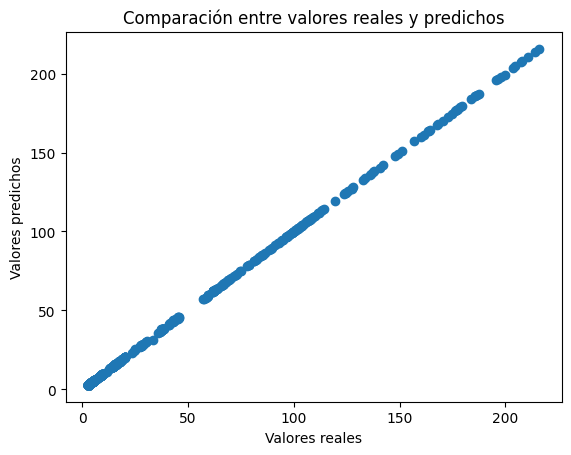

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')


Agregar una línea diagonal que representa una relación perfecta entre los valores reales y los valores predichos

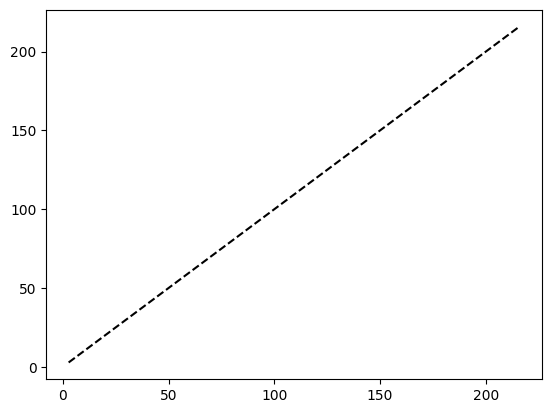

In [10]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

Mostrar el gráfico

In [11]:
plt.show()

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.015805030417732693
Coeficiente de determinación (R^2): 0.999991431041632
